# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [279]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('spam_or_not_spam.zip')
data.head()


,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [280]:
data['label'].value_counts()

0    2500
1     500
Name: label, dtype: int64

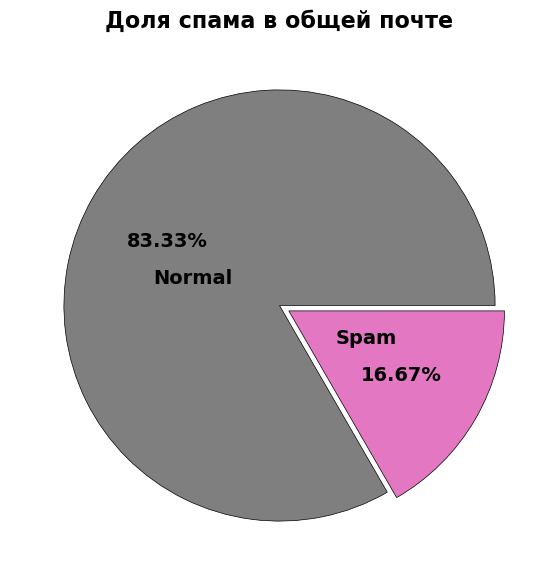

In [281]:
fig = plt.figure(figsize =(7, 7))
plt.style.use('default')
plt.pie(data['label'].value_counts(), 
        labels=('Normal','Spam'),
        colors=('C7','C6'),
        explode=(0, 0.05),
        autopct='%.2f%%',
        labeldistance=0.25,
        wedgeprops={'lw':0.5,'edgecolor':'k'},
        textprops={'fontweight':'semibold', 'fontsize':14})
plt.title('Доля спама в общей почте', fontweight='bold', fontsize=16);

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [282]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [283]:
data['email'] = data['email'].replace(' ', np.nan)
data = data.dropna(how='any', axis=0)

Переводим данные в векторный вид:

In [284]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["email"])
y = data['label']

Определите, сколько теперь признаков в нашем наборе данных:

In [285]:
X.shape, y.shape

((2997, 34116), (2997,))

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [286]:
from sklearn.model_selection import train_test_split

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [287]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=0.75,  
    stratify=y, 
    random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2247, 34116), (750, 34116), (2247,), (750,))

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [288]:
round(y_test.mean(),3)

0.165

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [289]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn import metrics

alpha = 0.01

MNB = MultinomialNB(alpha=alpha)
MNB.fit(X_train, y_train)

CNB = ComplementNB(alpha=alpha)
CNB.fit(X_train, y_train)


ComplementNB(alpha=0.01)

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [290]:
y_test_MNB = MNB.predict(X_test)
y_test_CNB = CNB.predict(X_test)

print(f"ComplementNB: {metrics.classification_report(y_test, y_test_CNB)}")
print()
print(f"MultinomialNB accuracy: {round(metrics.accuracy_score(y_test, y_test_MNB),3)}")
print(f"ComplementNB accuracy: {round(metrics.accuracy_score(y_test, y_test_CNB), 3)}")
print()
print(f"MultinomialNB precision: {round(metrics.precision_score(y_test, y_test_MNB), 3)}")
print(f"ComplementNB precision: {round(metrics.precision_score(y_test, y_test_CNB), 3)}")
print()
print(f"MultinomialNB recall: {round(metrics.recall_score(y_test, y_test_MNB), 3)}")
print(f"ComplementNB recall: {round(metrics.recall_score(y_test, y_test_CNB), 3)}")

ComplementNB:               precision    recall  f1-score   support

           0       0.99      1.00      0.99       626
           1       1.00      0.93      0.96       124

    accuracy                           0.99       750
   macro avg       0.99      0.96      0.98       750
weighted avg       0.99      0.99      0.99       750


MultinomialNB accuracy: 0.987
ComplementNB accuracy: 0.988

MultinomialNB precision: 1.0
ComplementNB precision: 1.0

MultinomialNB recall: 0.919
ComplementNB recall: 0.927


Нарисуйте ROC-кривую:

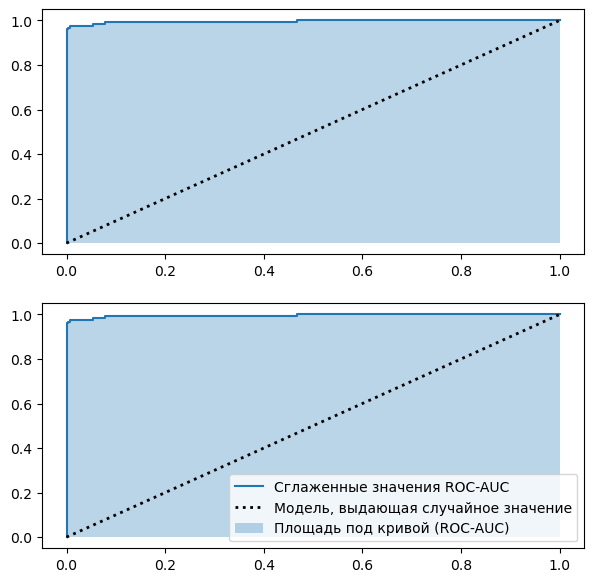

In [291]:
y_test_MNB_ROC = MNB.predict_proba(X_test)[:, 1]
y_test_CNB_ROC = CNB.predict_proba(X_test)[:, 1]

false_positive_rates_mnb, true_positive_rates_nmb, threshold_nmb = metrics.roc_curve(y_test, y_test_MNB_ROC)
false_positive_rates_cnb, true_positive_rates_cmb, threshold_cmb = metrics.roc_curve(y_test, y_test_CNB_ROC)

fig, axx = plt.subplots(2, 1, figsize=(7, 7))
axx[0].plot(false_positive_rates_mnb, true_positive_rates_nmb, 
         label='Сглаженные значения ROC-AUC')
axx[0].plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', 
         label='Модель, выдающая случайное значение')
axx[0].fill_between(false_positive_rates_mnb, true_positive_rates_nmb, step="pre", 
                 alpha=0.3, label='Площадь под кривой (ROC-AUC)')

axx[1].plot(false_positive_rates_cnb, true_positive_rates_cmb, 
         label='Сглаженные значения ROC-AUC')
axx[1].plot([0, 1], [0, 1], color='k', lw=2, linestyle=':', 
         label='Модель, выдающая случайное значение')
axx[1].fill_between(false_positive_rates_cnb, true_positive_rates_cmb, step="pre", 
                 alpha=0.3, label='Площадь под кривой (ROC-AUC)')
axx[1].legend()

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

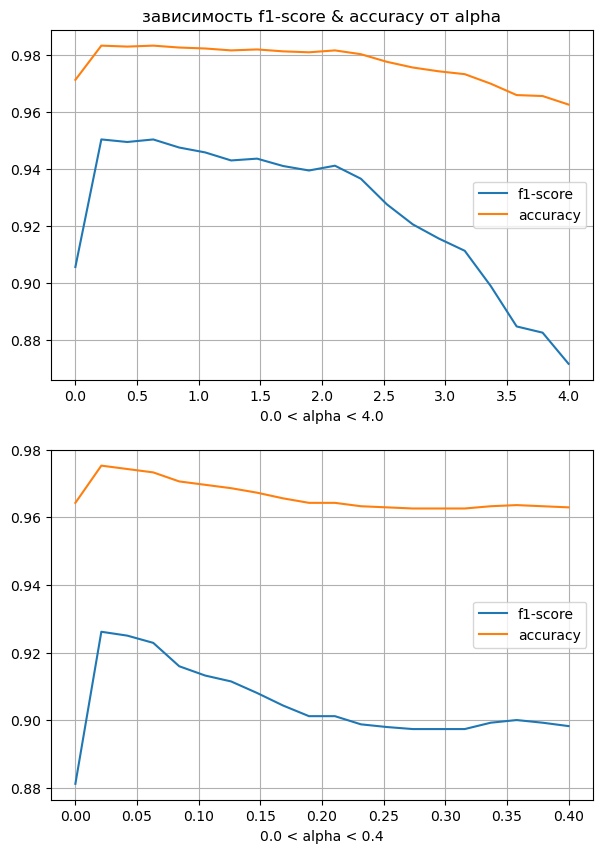

In [341]:
from sklearn.model_selection import cross_val_score

alpha_range = np.linspace(0.000001,4,20)
alpha_range_1 = np.linspace(0.000001,0.4,20)
f1_scores = []
f1_scores_1 = []
accuracy = []
accuracy_1 = []

for alpha in alpha_range:
    MNB = MultinomialNB(alpha=alpha)
    f1 = cross_val_score(MNB, X, y, cv=5, scoring='f1')
    acc = cross_val_score(MNB, X, y, cv=5, scoring='accuracy')
    accuracy.append(acc.mean())
    f1_scores.append(f1.mean())

for alpha in alpha_range_1:
    MNB = MultinomialNB(alpha=alpha)
    f1 = cross_val_score(MNB, X, y, cv=3, scoring='f1')
    acc = cross_val_score(MNB, X, y, cv=3, scoring='accuracy')
    accuracy_1.append(acc.mean())
    f1_scores_1.append(f1.mean())
    
fig, axx = plt.subplots(2, 1, figsize=(7, 10))
axx[0].plot(alpha_range, f1_scores)
axx[0].plot(alpha_range, accuracy)
axx[0].grid()
axx[0].set_xlabel('0.0 < alpha < 4.0')
axx[0].legend(['f1-score','accuracy'], loc=7)
axx[0].set_title('зависимость f1-score & accuracy от alpha')

axx[1].plot(alpha_range_1, f1_scores_1)
axx[1].plot(alpha_range_1, accuracy_1)
axx[1].grid()
axx[1].set_xlabel('0.0 < alpha < 0.4')
axx[1].legend(['f1-score','accuracy'], loc=7);